In [3]:
!pip install kora -q
from kora.selenium import wd

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 61kB 3.4MB/s 


In [32]:
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
market=['Achnera', 'Agra', 'Fatehabad','Fatehpur+Sikri', 'Jagnair', 'Jarar', 'Khairagarh','Samsabad']
code=['2551','314','2550','2555','2553','2554','2552','2556']

In [28]:

df=pd.DataFrame()
market=['Achnera', 'Agra', 'Fatehabad','Fatehpur Sikri', 'Jagnair', 'Jarar', 'Khairagarh','Samsabad']
for i in tqdm(range(len(market))):
  print(i)
  url=("https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=24&Tx_State=UP&Tx_District=1&Tx_Market="+str(code[i])+"&DateFrom=01-Jan-2020&DateTo=31-Dec-2020&Fr_Date=01-Jan-2020&To_Date=31-Dec-2020&Tx_Trend=0&Tx_CommodityHead=Potato&Tx_StateHead=Uttar+Pradesh&Tx_DistrictHead=Agra&Tx_MarketHead="+str(market[i]))
  wd.get(url)
  wd.find_element_by_id("cphBody_ButtonExcel").click()
  data=pd.read_html("/content/Agmarknet_Price_Report.xls")
  df=pd.concat([data[0],df],axis=0)
df.to_csv("data.csv",index=False)




  0%|          | 0/8 [00:00<?, ?it/s]

0


 12%|█▎        | 1/8 [00:05<00:41,  5.91s/it]

1


 25%|██▌       | 2/8 [00:11<00:34,  5.79s/it]

2


 38%|███▊      | 3/8 [00:20<00:34,  6.82s/it]

3


 50%|█████     | 4/8 [00:27<00:27,  6.83s/it]

4


 62%|██████▎   | 5/8 [00:31<00:17,  5.99s/it]

5


 75%|███████▌  | 6/8 [00:35<00:10,  5.47s/it]

6


 88%|████████▊ | 7/8 [00:39<00:05,  5.02s/it]

7


100%|██████████| 8/8 [00:44<00:00,  5.62s/it]


In [29]:
df=pd.read_csv("/content/data.csv")

In [30]:
df

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Agra,Khairagarh,Potato,Desi,FAQ,1100,1200,1150,31 Dec 2020
1,2,Agra,Khairagarh,Potato,Desi,FAQ,1100,1200,1150,30 Dec 2020
2,3,Agra,Khairagarh,Potato,Desi,FAQ,1500,1600,1550,29 Dec 2020
3,4,Agra,Khairagarh,Potato,Desi,FAQ,1500,1600,1550,28 Dec 2020
4,5,Agra,Khairagarh,Potato,Desi,FAQ,1500,1600,1550,27 Dec 2020
...,...,...,...,...,...,...,...,...,...,...
1960,302,Agra,Achnera,Potato,Desi,FAQ,1250,1350,1300,06 Jan 2020
1961,303,Agra,Achnera,Potato,Desi,FAQ,1280,1360,1320,05 Jan 2020
1962,304,Agra,Achnera,Potato,Desi,FAQ,1250,1350,1300,04 Jan 2020
1963,305,Agra,Achnera,Potato,Desi,FAQ,1300,1400,1350,03 Jan 2020


In [53]:
df.isnull().sum()

Sl no.                       0
District Name                0
Market Name                  0
Commodity                    0
Variety                      0
Grade                        0
Min Price (Rs./Quintal)      0
Max Price (Rs./Quintal)      0
Modal Price (Rs./Quintal)    0
Price Date                   0
dtype: int64

In [58]:
df.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [60]:
df["Variety"].value_counts()

Desi      1672
Local      290
Potato       2
Other        1
Name: Variety, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

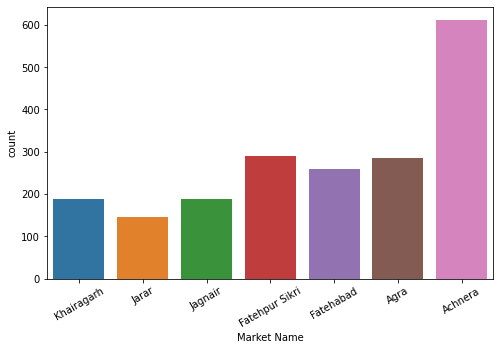

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df["Market Name"])
plt.xticks(rotation=30)

In [48]:
df.dtypes

Sl no.                                int64
District Name                        object
Market Name                          object
Commodity                            object
Variety                              object
Grade                                object
Min Price (Rs./Quintal)               int64
Max Price (Rs./Quintal)               int64
Modal Price (Rs./Quintal)             int64
Price Date                   datetime64[ns]
dtype: object

In [47]:
df["Price Date"]=pd.DatetimeIndex(df["Price Date"])

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 1440x720 with 0 Axes>

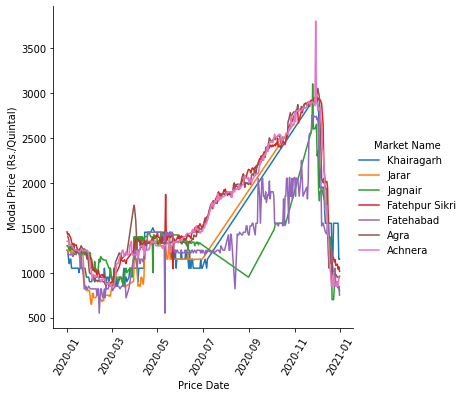

In [61]:
plt.figure(figsize=(20,10))
sns.relplot(data=df,x="Price Date",y="Modal Price (Rs./Quintal)",hue="Market Name",kind="line",)
plt.xticks(rotation=60)

(array([737425., 737485., 737546., 737607., 737669., 737730., 737791.]),
 <a list of 7 Text major ticklabel objects>)

<Figure size 1440x720 with 0 Axes>

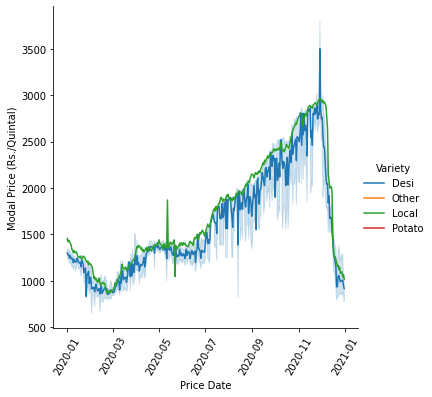

In [59]:
plt.figure(figsize=(20,10))
sns.relplot(data=df,x="Price Date",y="Modal Price (Rs./Quintal)",hue="Variety",kind="line",)
plt.xticks(rotation=60)